### Importing the Libraries

In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import os
import numpy as np
import seaborn as sns
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

### Data Preprocessing:
In the preprocessing phase of the training set, it is done by trasnforming all the images of the training set only in order to avoid overfitting. These trasnformations is also called Image Augumentation. It may include some roations, zooms, simple geometric transformations, etc

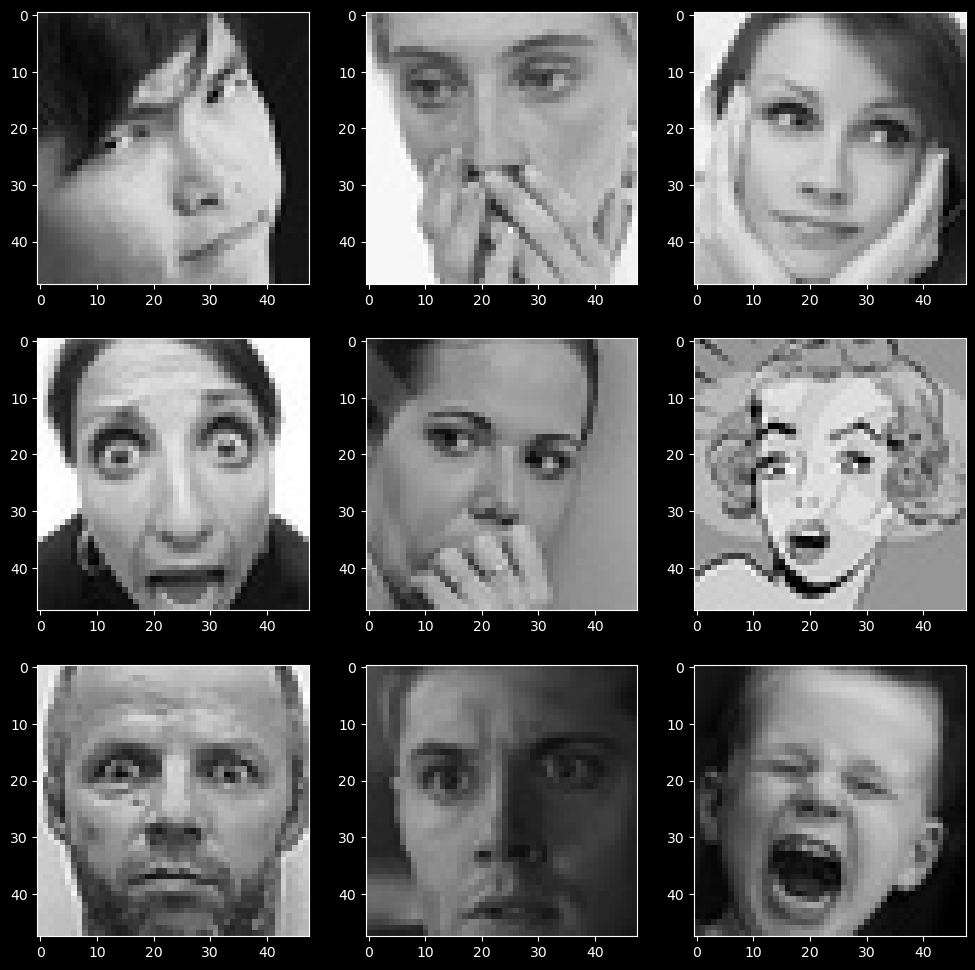

In [28]:
expression = 'fear'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(48, 48))
    plt.imshow(img)
plt.show()

In [29]:
datagen_train = ImageDataGenerator()
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True)

Found 28821 images belonging to 7 classes.


In [30]:
datagen_val = ImageDataGenerator()
test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                           target_size = (48, 48),
                                           color_mode = "grayscale",
                                           batch_size=128,
                                           class_mode='categorical',
                                           shuffle=False)

Found 7066 images belonging to 7 classes.


### Building the CNN

In [31]:
no_of_classes = 7
model = Sequential()

#First CNN layer
model.add(Conv2D(64,(3,3),padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Second CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Third CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected First layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected Second layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation= 'softmax'))


opt = Adam(lr = 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)      

##### Second Convolutional layer:

##### Model fitting with Training and Test data:

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True
                               )
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

In [34]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                              

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/48
225/225 [==============================] - 583s 3s/step - loss: 1.7062 - accuracy: 0.3516 - val_loss: 1.7960 - val_accuracy: 0.3770 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 575s 3s/step - loss: 1.3864 - accuracy: 0.4724 - val_loss: 1.3748 - val_accuracy: 0.4901 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 575s 3s/step - loss: 1.2469 - accuracy: 0.5223 - val_loss: 1.2084 - val_accuracy: 0.5474 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 575s 3s/step - loss: 1.1548 - accuracy: 0.5605 - val_loss: 1.2601 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 574s 3s/step - loss: 1.0956 - accuracy: 0.5838 - val_loss: 1.1718 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 574s 3s/step - loss: 1.0287 - accuracy: 0.6130 - val_loss: 1.2592 - val_accuracy: 0.5224 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 581s 3s/st

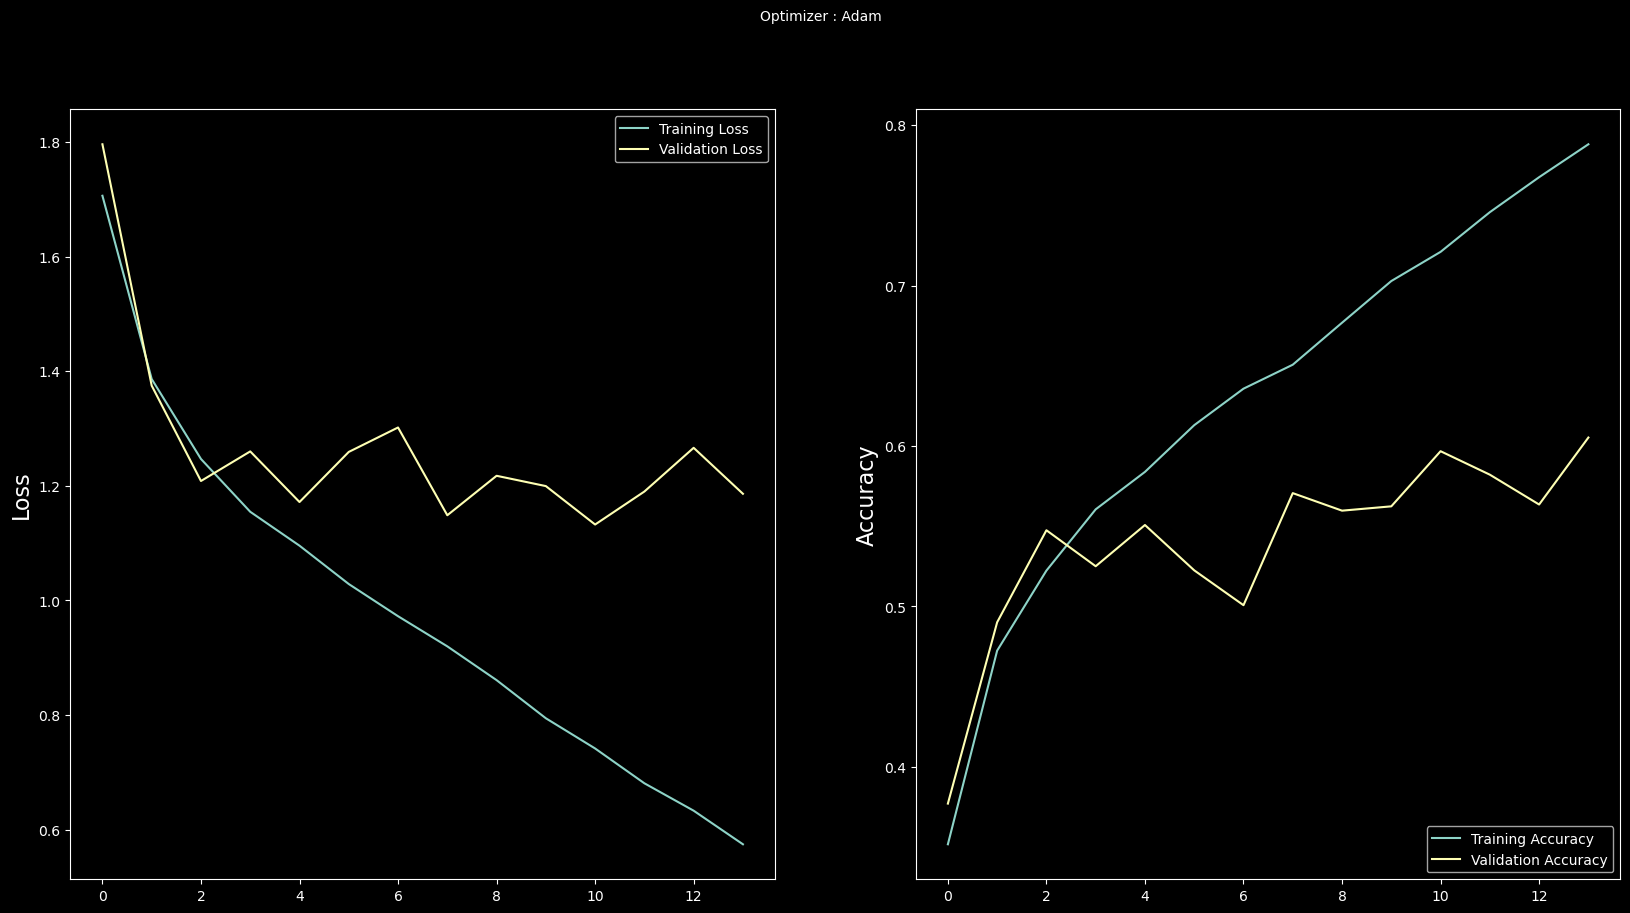

In [35]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [37]:
model.save('Facial_emotion_model.h5')